# Исследование тарифов телеком компании

Даны два тарифных плана федерального оператора сотовой связи: «Смарт» и «Ультра»:

**Тариф «Смарт»**
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

<u>Примечание</u>: Оператор всегда округляет секунды до минут, а мегабайты за месяц — до гигабайт. 

Нужно понять, какой тариф приносит больше денег, для корректировки бюджета на рекламу. В нашем распоряжении данные 500 пользователей, чье поведение нужно проанализировать: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Данные предоставлены в файлах: calls.csv (информация о звонках), internet.csv (информация об интернет-сессиях), messages.csv (информация о сообщениях), tariffs.csv (информация о тарифах), users.csv (информация о пользователях).

**Цель исследования** — проверить гипотезы:
1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
2. Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Оглавление проекта**
1. [Изучение данных из файлов](#start)
    * 1.1. [Вывод](#conclusion_1)
2. [Предобработка данных](#preprocessing)
    * 2.1. [Замена типа данных](#preprocessing_1)
    * 2.2. [Подготовка пользовательских данных](#preprocessing_2)
3. [Анализ и описание данных](#analysis)
    * 3.1. [Подсчет средних и разброс значений](#analysis_1)
    * 3.2. [Гистограммы](#analysis_2)
    * 3.3. [Вывод по распределениям](#conclusion_3)
4. [Проверка гипотез](#hypotheses)
5. [Общий вывод](#conclusion)

## Изучение данных из файлов
<a id="start"></a>

In [1]:
# импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Получение общей информации о данных и первых 10 строк всех таблиц:

In [2]:
path = 'C:/Data/telecom/'
data_calls = pd.read_csv(path + 'calls.csv')
data_internet = pd.read_csv(path + 'internet.csv')
data_messages = pd.read_csv(path + 'messages.csv')
data_tariffs = pd.read_csv(path + 'tariffs.csv')
data_users = pd.read_csv(path + 'users.csv')

# добавляем название файлов и датафреймы в словарь
files_dict = {'calls':data_calls, 'internet':data_internet, 'messages':data_messages, 'tariffs':data_tariffs, 'users':data_users}
for i,j in files_dict.items():
    print(f"Получение информации по файлу {i}:")
    print('')
    j.info()
    j.head(10)
    print('')

Получение информации по файлу calls:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000



Получение информации по файлу internet:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000



Получение информации по файлу messages:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000



Получение информации по файлу tariffs:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



Получение информации по файлу users:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Получение случайных 10 значений по всем таблицам кроме **tariffs**:

In [3]:
files_dict = {'calls':data_calls, 'internet':data_internet, 'messages':data_messages, 'users':data_users}
for i,j in files_dict.items():
    print(f"Получение случайных 10 строк по файлу {i}:")
    j.sample(n=10, random_state=1)
    print('')

Получение случайных 10 строк по файлу calls:


,id,call_date,duration,user_id
26953,1066_374,2018-08-26,0.00,1066
66122,1168_1273,2018-03-28,16.05,1168
67325,1171_350,2018-09-14,6.23,1171
74643,1186_465,2018-09-02,0.79,1186
192311,1472_124,2018-05-04,5.94,1472
47375,1118_664,2018-10-24,13.41,1118
91143,1227_563,2018-08-03,15.15,1227
3818,1010_67,2018-08-16,14.29,1010
182822,1454_574,2018-09-23,9.98,1454
187346,1463_0,2018-12-05,10.63,1463



Получение случайных 10 строк по файлу internet:


,Unnamed: 0,id,mb_used,session_date,user_id
35745,35745,1124_125,122.45,2018-12-03,1124
18383,18383,1064_102,320.60,2018-12-19,1064
59774,59774,1203_22,605.96,2018-06-17,1203
56317,56317,1188_123,781.73,2018-05-08,1188
52231,52231,1176_386,150.98,2018-08-20,1176
20276,20276,1068_26,389.65,2018-12-04,1068
82748,82748,1281_64,841.89,2018-11-07,1281
129266,129266,1431_300,461.23,2018-11-26,1431
46783,46783,1160_75,0.00,2018-08-15,1160
48492,48492,1168_260,336.06,2018-07-28,1168



Получение случайных 10 строк по файлу messages:


,id,message_date,user_id
45696,1197_26,2018-12-31,1197
66091,1282_523,2018-11-30,1282
18743,1082_184,2018-10-18,1082
33759,1146_557,2018-12-22,1146
11403,1048_49,2018-09-27,1048
97793,1401_125,2018-08-10,1401
406,1000_406,2018-12-29,1000
71393,1302_221,2018-10-23,1302
103004,1420_11,2018-12-12,1420
53795,1238_208,2018-10-08,1238



Получение случайных 10 строк по файлу users:


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
304,1304,68,NaN,Владимир,Илья,Соловьёв,2018-11-05,ultra
340,1340,50,NaN,Пенза,Тимофей,Алютин,2018-01-30,smart
47,1047,67,NaN,Саратов,Милица,Меркулова,2018-10-29,smart
67,1067,45,NaN,Москва,Юзефа,Абашкина,2018-04-09,smart
479,1479,40,NaN,Хабаровск,Игорь,Богданов,2018-07-03,smart
485,1485,34,NaN,Киров,Таисия,Сухова,2018-12-29,ultra
310,1310,28,NaN,Уфа,Рудольф,Нестеров,2018-03-22,ultra
31,1031,66,NaN,Москва,Лаврентий,Тимофеев,2018-11-02,smart
249,1249,25,NaN,Курск,Изольда,Авдушева,2018-08-14,smart
90,1090,54,2018-12-03,Череповец,Екатерина,Астафьева,2018-10-11,ultra


Вывод описательной статистики для таблиц по столбцам в транспонированном виде:

In [4]:
for i,j in files_dict.items():
    print(f"Описательная статистика по файлу {i}:")
    j.describe(include='all').T
    print('')

Описательная статистика по файлу calls:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,202607,202607,1150_10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
call_date,202607,365,2018-12-31,1435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,202607,NaN,NaN,NaN,6.75589,5.84337,0,1.3,6,10.7,38
user_id,202607,NaN,NaN,NaN,1253.94,144.723,1000,1126,1260,1379,1499



Описательная статистика по файлу internet:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396,NaN,NaN,NaN,74697.5,43127.1,0,37348.8,74697.5,112046,149395
id,149396,149396,1310_238,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mb_used,149396,NaN,NaN,NaN,370.192,278.301,0,138.188,348.015,559.553,1724.83
session_date,149396,365,2018-12-31,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,149396,NaN,NaN,NaN,1252.1,144.051,1000,1130,1251,1380,1499



Описательная статистика по файлу messages:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,123036,123036,1431_765,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
message_date,123036,364,2018-12-31,859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,123036,NaN,NaN,NaN,1256.99,143.524,1000,1134,1271,1381,1499



Описательная статистика по файлу users:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,500,NaN,NaN,NaN,1249.5,144.482,1000,1124.75,1249.5,1374.25,1499
age,500,NaN,NaN,NaN,46.588,16.6676,18,32,46,62,75
churn_date,38,33,2018-12-21,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,500,76,Москва,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_name,500,246,Радим,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_name,500,419,Андреенко,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reg_date,500,270,2018-05-28,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tariff,500,2,smart,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Вывод
<a id="conclusion_1"></a>
В таблице **calls** 4 столбца:

* `id` — уникальный номер звонка, тип object;
* `call_date` — дата звонка, тип object;  
* `duration` — длительность звонка в минутах, тип float64;
* `user_id` — идентификатор пользователя, сделавшего звонок, тип int64.

Пропущенных значений в таблице нет. Столбец `call_date` уместнее перевести в тип datetime. В столбце `duration` много звонков с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять согласно документации.

В таблице **internet** 5 столбцов:

* `Unnamed: 0` - столбец отсутствует в документации, тип int64;
* `id` — уникальный номер сессии, тип object;
* `mb_used` — объём потраченного за сессию интернет-трафика в мегабайтах, тип float64;
* `session_date` — дата интернет-сессии, тип object;
* `user_id` — идентификатор пользователя, тип int64.

Пропущенных значений в таблице нет. Столбец `Unnamed: 0` можно просто удалить, т.к. он не несет доп. информации и копирует индексы, скорее всего добавился в результате тех. ошибки. Столбец `session_date` уместнее перевести в тип datetime.

В таблице **messages** 3 столбца:

* `id` — уникальный номер сообщения, тип object;
* `message_date` — дата сообщения, тип object; 
* `user_id` — идентификатор пользователя, тип int64.

Пропущенных значений в таблице нет. Столбец `message_date` уместнее перевести в тип datetime.

В таблице **tariffs** 8 столбцов:

* `tariff_name` — название тарифа, тип object;
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях, тип int64;
* `minutes_included` — количество минут разговора в месяц (включённых в абонентскую плату), тип int64;
* `messages_included` — количество сообщений в месяц (включённых в абонентскую плату), тип int64;
* `mb_per_month_included` — объём интернет-трафика (включённого в абонентскую плату в мегабайтах), тип int64;
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата), тип int64;
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета, тип int64;
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта), тип int64.

Пропущенных значений в таблице нет. Данные по тарифам совпадают с заявленными заказчиком.

В таблице **users** 8 столбцов:

* `user_id` — уникальный идентификатор пользователя, тип int64;
* `first_name` — имя пользователя, тип object;
* `last_name` — фамилия пользователя, тип object;
* `age` — возраст пользователя (годы), тип int64;
* `reg_date` — дата подключения тарифа (день, месяц, год), тип object;
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных), тип object;
* `city` — город проживания пользователя, тип object;
* `tarif` — название тарифного плана, тип object.

Есть большое количество пропущенных значений в столбце `churn_date`, но это не является ошибкой, как указано в документации. Столбец `reg_date` уместнее перевести в тип datetime.

В данных информация по 500 пользователям, идентификаторы в таблицах с 1000 по 1499. Из них 351 пользователь использовал тариф smart, т.е. тарифом ultra пользовались 149 пользователей. Предварительно можно утверждать, что данных достаточно для проверки гипотез. Чтобы ответить на поставленные вопросы, нужно устранить проблемы в данных.

## Предобработка данных
<a id="preprocessing"></a>

In [5]:
# проверка таблиц на явные и неявные дубликаты (проверял, где было уместно, для примера оставил по таблице users)
print('Найдено дубликатов:', data_users.duplicated().sum())
data_users['full_name'] = data_users['first_name'] + ' ' + data_users['last_name']
data_users['full_name'].str.lower().value_counts()

Найдено дубликатов: 0


сабина озерова            1
таисия богданова          1
олег любимов              1
марта ситникова           1
софья терехова            1
                         ..
авксентий фокин           1
геодар афонин             1
евфросинья серебрякова    1
артём аракчеев            1
георгий вишняков          1
Name: full_name, Length: 500, dtype: int64

In [6]:
# удаление ненужного столбца
data_internet = data_internet.drop('Unnamed: 0', 1)

### Замена типа данных
<a id="preprocessing_1"></a>

In [7]:
DAY_FORMAT = '%Y.%m.%d'
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format=DAY_FORMAT)
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format=DAY_FORMAT)
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format=DAY_FORMAT)
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format=DAY_FORMAT)
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format=DAY_FORMAT)

In [8]:
# выделяем месяц
data_calls['month'] = data_calls['call_date'].dt.month
data_internet['month'] = data_internet['session_date'].dt.month
data_messages['month'] = data_messages['message_date'].dt.month

### Подготовка пользовательских данных
<a id="preprocessing_2"></a>
Посчитаем для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [9]:
# округление минут в большую сторону
data_calls['duration'] = data_calls['duration'].apply(math.ceil)

# группировка звонков по клиентам и месяцам
calls_grouped = data_calls.groupby(['user_id', 'month']).agg({'duration': ['count', 'sum']}).reset_index()
calls_grouped.columns = ['user_id', 'month', 'calls_count', 'duration_sum']

# группировка сообщений по клиентам и месяцам
messages_grouped = data_messages.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()
messages_grouped.columns = ['user_id', 'month', 'messages_count']

# объединение в новую таблицу data группировки по звонкам и сообщениям
data = calls_grouped.merge(messages_grouped, on = ['user_id', 'month'], how = 'outer')

# группировка использования интернета по клиентам и месяцам
internet_grouped = data_internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()

# объединение новой таблицы data и группировки использования интернета
data = data.merge(internet_grouped, on = ['user_id', 'month'], how = 'outer')

# объединение новой таблицы data с таблицами по пользователям и тарифам
data = data.merge(data_users, on = 'user_id')
data = data.rename(columns={'tariff': 'tariff_name'})
data = data.merge(data_tariffs, on = 'tariff_name')
data

,user_id,month,calls_count,duration_sum,messages_count,mb_used,age,churn_date,city,first_name,...,reg_date,tariff_name,full_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,Рафаил Верещагин,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,Рафаил Верещагин,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,Рафаил Верещагин,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,Рафаил Верещагин,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,Рафаил Верещагин,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,17.0,11050.56,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,Павел Гончаров,50,15360,500,550,200,3,3
3210,1489,9,NaN,NaN,32.0,17206.30,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,Павел Гончаров,50,15360,500,550,200,3,3
3211,1489,10,NaN,NaN,21.0,19559.44,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,Павел Гончаров,50,15360,500,550,200,3,3
3212,1489,11,NaN,NaN,20.0,17491.56,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,Павел Гончаров,50,15360,500,550,200,3,3


In [10]:
# заполняем отсутствующие значения нулем в сгруппированных столбцах 
data['calls_count'] = data['calls_count'].fillna(0)
data['duration_sum'] = data['duration_sum'].fillna(0)
data['messages_count'] = data['messages_count'].fillna(0)
data['mb_used'] = data['mb_used'].fillna(0)

# добавляем столбец со стоимостью превышенных минут
data['minutes_over'] = (data['duration_sum'] - data['minutes_included']) * data['rub_per_minute']

# добавляем столбец со стоимостью превышенных сообщений
data['messages_over'] = (data['messages_count'] - data['messages_included']) * data['rub_per_message']

# добавляем столбец со стоимостью превышенного интернет-траффика с округлением трафика
data['gb_over'] = ((data['mb_used'] - data['mb_per_month_included'])/1024).apply(math.ceil) * data['rub_per_gb']

# убираем отрицательные значения и приравниваем их к 0
data.loc[(data['minutes_over'] < 0, 'minutes_over')] = 0
data.loc[(data['messages_over'] < 0, 'messages_over')] = 0
data.loc[(data['gb_over'] < 0, 'gb_over')] = 0

# добавляем столбец с помесячным доходом
data['revenue_per_month'] = data['rub_monthly_fee'] + data['minutes_over'] + data['messages_over'] + data['gb_over']

data

,user_id,month,calls_count,duration_sum,messages_count,mb_used,age,churn_date,city,first_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_over,messages_over,gb_over,revenue_per_month
0,1000,5,22.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0.0,0,1950.0
1,1000,6,43.0,172.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0.0,0,1950.0
2,1000,7,47.0,340.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0.0,0,1950.0
3,1000,8,52.0,408.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0.0,0,1950.0
4,1000,9,58.0,466.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0.0,0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,17.0,11050.56,35,NaT,Санкт-Петербург,Павел,...,15360,500,550,200,3,3,0.0,0.0,0,550.0
3210,1489,9,0.0,0.0,32.0,17206.30,35,NaT,Санкт-Петербург,Павел,...,15360,500,550,200,3,3,0.0,0.0,400,950.0
3211,1489,10,0.0,0.0,21.0,19559.44,35,NaT,Санкт-Петербург,Павел,...,15360,500,550,200,3,3,0.0,0.0,1000,1550.0
3212,1489,11,0.0,0.0,20.0,17491.56,35,NaT,Санкт-Петербург,Павел,...,15360,500,550,200,3,3,0.0,0.0,600,1150.0


## Анализ и описание данных
<a id="analysis"></a>
Каждая строка в сгруппированной таблице **data** - это помесячные данные по пользователям. Т.е. каждая строка дает одно наблюдение о том, сколько абоненты тратят в месяц. Возьмем все строки для каждого тарифа, ответим на вопросы - Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение для каждого параметра.

### Подсчет средних и разброс значений
<a id="analysis_1"></a>

In [11]:
data_smart = data.query('tariff_name == "smart"')

duration_smart_avg = data_smart['duration_sum'].mean()
messages_smart_avg = data_smart['messages_count'].mean()
mb_smart_avg = data_smart['mb_used'].mean()

duration_smart_var_estimate = np.var(data_smart['duration_sum'], ddof=1)
messages_smart_var_estimate = np.var(data_smart['messages_count'], ddof=1)
mb_smart_var_estimate = np.var(data_smart['mb_used'], ddof=1)

duration_smart_std_deviation = np.sqrt(duration_smart_var_estimate)
messages_smart_std_deviation = np.sqrt(messages_smart_var_estimate)
mb_smart_std_deviation = np.sqrt(mb_smart_var_estimate)
print('Среднее количество минут, которое требуется пользователям smart в мес.:', round(duration_smart_avg, 2))
print('Дисперсия для выборки по количеству минут для тарифа smart:', round(duration_smart_var_estimate, 2))
print('Стандартное отклонение по количеству минут для тарифа smart:', round(duration_smart_std_deviation, 2))
print('')
print('Среднее количество сообщений, которое требуется пользователям smart в мес.:', round(messages_smart_avg, 2))
print('Дисперсия для выборки по количеству сообщений для тарифа smart:', round(messages_smart_var_estimate ,2))
print('Стандартное отклонение по количеству минут для тарифа smart:', round(messages_smart_std_deviation, 2))
print('')
print('Среднее количество интернет-трафика, которое требуется пользователям smart в мес.:', round(mb_smart_avg, 2))
print('Дисперсия для выборки по количеству сообщений для тарифа smart:', round(mb_smart_var_estimate, 2))
print('Стандартное отклонение по количеству минут для тарифа smart:', round(mb_smart_std_deviation, 2))
print('')

data_ultra = data.query('tariff_name == "ultra"')

duration_ultra_avg = data_ultra['duration_sum'].mean()
messages_ultra_avg = data_ultra['messages_count'].mean()
mb_ultra_avg = data_ultra['mb_used'].mean()

duration_ultra_var_estimate = np.var(data_ultra['duration_sum'], ddof=1)
messages_ultra_var_estimate = np.var(data_ultra['messages_count'], ddof=1)
mb_ultra_var_estimate = np.var(data_ultra['mb_used'], ddof=1)

duration_ultra_std_deviation = np.sqrt(duration_ultra_var_estimate)
messages_ultra_std_deviation = np.sqrt(messages_ultra_var_estimate)
mb_ultra_std_deviation = np.sqrt(mb_ultra_var_estimate)
print('Среднее количество минут, которое требуется пользователям ultra в мес.:', round(duration_ultra_avg, 2))
print('Дисперсия для выборки по количеству минут для тарифа ultra:', round(duration_ultra_var_estimate, 2))
print('Стандартное отклонение по количеству минут для тарифа ultra:', round(duration_ultra_std_deviation, 2))
print('')
print('Среднее количество сообщений, которое требуется пользователям ultra в мес.:', round(messages_ultra_avg, 2))
print('Дисперсия для выборки по количеству сообщений для тарифа ultra:', round(messages_ultra_var_estimate ,2))
print('Стандартное отклонение по количеству минут для тарифа ultra:', round(messages_ultra_std_deviation, 2))
print('')
print('Среднее количество интернет-трафика, которое требуется пользователям ultra в мес.:', round(mb_ultra_avg, 2))
print('Дисперсия для выборки по количеству сообщений для тарифа ultra:', round(mb_ultra_var_estimate, 2))
print('Стандартное отклонение по количеству минут для тарифа ultra:', round(mb_ultra_std_deviation, 2))

Среднее количество минут, которое требуется пользователям smart в мес.: 417.93
Дисперсия для выборки по количеству минут для тарифа smart: 36219.32
Стандартное отклонение по количеству минут для тарифа smart: 190.31

Среднее количество сообщений, которое требуется пользователям smart в мес.: 33.38
Дисперсия для выборки по количеству сообщений для тарифа smart: 796.81
Стандартное отклонение по количеству минут для тарифа smart: 28.23

Среднее количество интернет-трафика, которое требуется пользователям smart в мес.: 16208.39
Дисперсия для выборки по количеству сообщений для тарифа smart: 34462496.46
Стандартное отклонение по количеству минут для тарифа smart: 5870.48

Среднее количество минут, которое требуется пользователям ultra в мес.: 526.62
Дисперсия для выборки по количеству минут для тарифа ultra: 100873.63
Стандартное отклонение по количеству минут для тарифа ultra: 317.61

Среднее количество сообщений, которое требуется пользователям ultra в мес.: 49.36
Дисперсия для выборки по

In [12]:
# удобный вывод анализируемых показателей через pivot_table
data.pivot_table(index='tariff_name', values=['duration_sum', 'messages_count', 'mb_used'], 
                 aggfunc=['mean', np.var, np.std]).round(2)

mean                                   var                \
            duration_sum   mb_used messages_count duration_sum       mb_used   
tariff_name                                                                    
smart             417.93  16208.39          33.38     36219.32  3.446250e+07   
ultra             526.62  19468.81          49.36    100873.63  1.017510e+08   

                                    std                           
            messages_count duration_sum   mb_used messages_count  
tariff_name                                                       
smart               796.81       190.31   5870.48          28.23  
ultra              2285.27       317.61  10087.17          47.80

### Гистограммы
<a id="analysis_2"></a>
Строим гистрограммы для гаждого параметра в сравнении по тарифам:

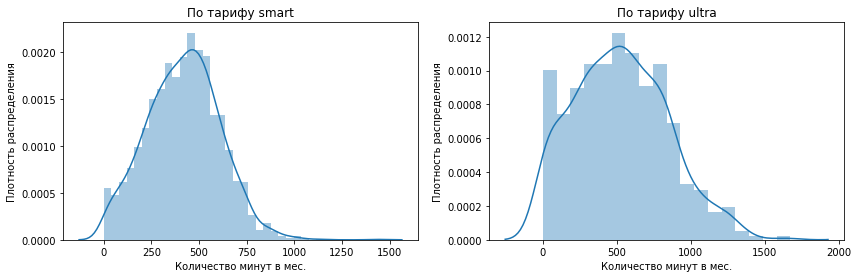

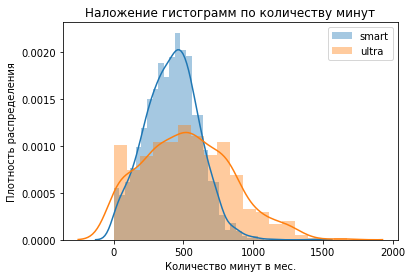

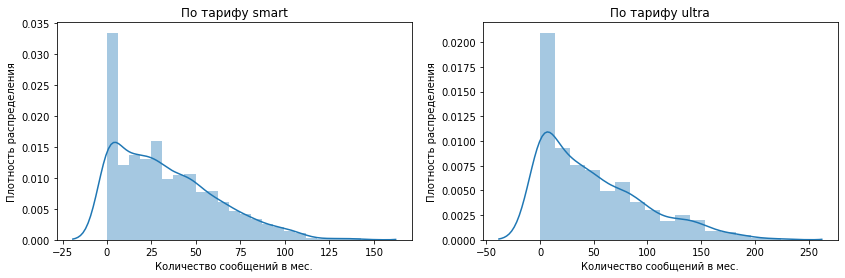

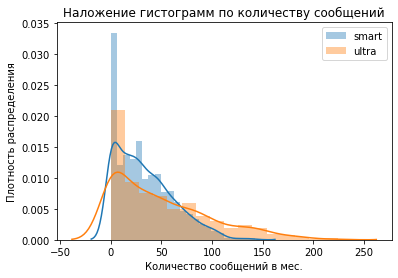

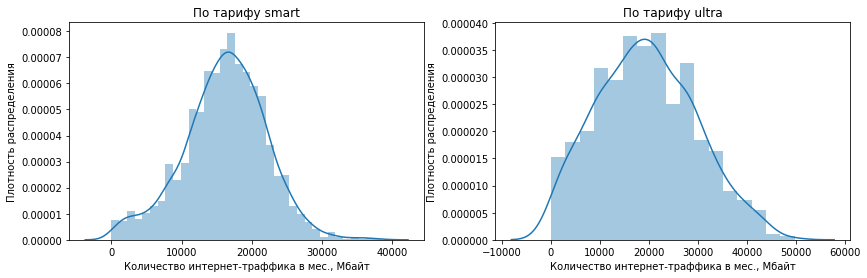

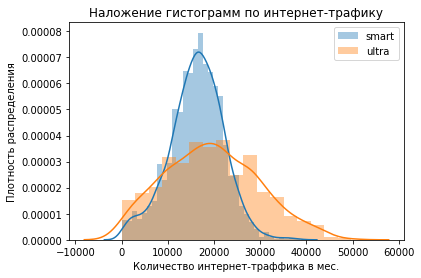

In [13]:
# используем гистограммы c графиком плотности распределения
fig, ax1 =plt.subplots(1, 2, figsize=(14, 4))
sns.distplot(data_smart['duration_sum'], ax=ax1[0])
ax1[0].set(xlabel = 'Количество минут в мес.', ylabel = 'Плотность распределения')
ax1[0].set_title('По тарифу smart');
sns.distplot(data_ultra['duration_sum'], ax=ax1[1])
ax1[1].set(xlabel = 'Количество минут в мес.', ylabel = 'Плотность распределения')
ax1[1].set_title('По тарифу ultra')
plt.show();

sns.distplot(data_smart['duration_sum'], label='smart')
sns.distplot(data_ultra['duration_sum'], label='ultra')
plt.xlabel('Количество минут в мес.')
plt.ylabel('Плотность распределения')
plt.title('Наложение гистограмм по количеству минут')
plt.legend();

fig, ax2 =plt.subplots(1, 2, figsize=(14, 4))
sns.distplot(data_smart['messages_count'], ax=ax2[0])
ax2[0].set(xlabel = 'Количество сообщений в мес.', ylabel = 'Плотность распределения')
ax2[0].set_title('По тарифу smart');
sns.distplot(data_ultra['messages_count'], ax=ax2[1])
ax2[1].set(xlabel = 'Количество сообщений в мес.', ylabel = 'Плотность распределения')
ax2[1].set_title('По тарифу ultra')
plt.show();

sns.distplot(data_smart['messages_count'], label='smart')
sns.distplot(data_ultra['messages_count'], label='ultra')
plt.xlabel('Количество сообщений в мес.')
plt.ylabel('Плотность распределения')
plt.title('Наложение гистограмм по количеству сообщений')
plt.legend();

fig, ax3 =plt.subplots(1, 2, figsize=(14, 4))
sns.distplot(data_smart['mb_used'], ax=ax3[0])
ax3[0].set(xlabel = 'Количество интернет-траффика в мес., Мбайт', ylabel = 'Плотность распределения')
ax3[0].set_title('По тарифу smart');
sns.distplot(data_ultra['mb_used'], ax=ax3[1])
ax3[1].set(xlabel = 'Количество интернет-траффика в мес., Мбайт', ylabel = 'Плотность распределения')
ax3[1].set_title('По тарифу ultra')
plt.show();

sns.distplot(data_smart['mb_used'], label='smart')
sns.distplot(data_ultra['mb_used'], label='ultra')
plt.xlabel('Количество интернет-траффика в мес.')
plt.ylabel('Плотность распределения')
plt.title('Наложение гистограмм по интернет-трафику')
plt.legend();

### Вывод по распределениям
<a id="conclusion_3"></a>
По параметру ежемесячного количества минут для обоих тарифов значения распределены на гистограммах нормально (нормальное распределение). Среднее количество минут для тарифа smart почти 418 мин. со стандартным отклонением около 190 мин. при предоплаченном лимите в 500 мин. Среднее количество минут для тарифа ultra почти 527 мин. со стандартным отклонением около 318 мин. при предоплаченном лимите в 3000 мин. Стандартное отклонение по этому параметру на тарифе smart меньше (значения распределены кучнее к среднему значению), но по графику видно, что многие клиенты превышают предоплаченный лимит. На тарифе ultra клиенты не превышают выделенного ежемесячного лимита по количеству минут.

По параметру ежемесячного количества сообщений для обоих тарифов значения распределены на гистограммах с положительной ассиметрией. Среднее количество сообщений для тарифа smart около 30 шт. со стандартным отклонением около 28 шт. при предоплаченном лимите в 50 сообщений. Среднее количество сообщений для тарифа ultra около 49 шт. со стандартным отклонением около 48 шт. при предоплаченном лимите в 1000 шт. Стандартное отклонение по этому параметру на тарифе smart меньше (значения распределены кучнее к среднему значению), но по графику видно, что многие клиенты превышают предоплаченный лимит. На тарифе ultra клиенты не превышают выделенного ежемесячного лимита по количеству сообщений.

По параметру ежемесячного использования интернет-трафика для обоих тарифов значения распределены на гистограммах нормально (нормальное распределение). Среднее количество интернет-трафика для тарифа smart около 16208 МБ со стандартным отклонением около 5870 МБ при предоплаченном лимите в 15360 МБ. Среднее количество интернет-трафика для тарифа ultra почти 19469 МБ со стандартным отклонением около 10087 МБ при предоплаченном лимите в 30720 МБ. Стандартное отклонение по этому параметру на тарифе smart меньше (значения распределены кучнее к среднему значению), но даже среднее значение потребления интернета пользователями на тарифе smart превышает предоплаченный лимит. На тарифе ultra клиенты тоже превышают выделенный ежемесячный лимит интернет-трафика, но не так часто, как на тарифе smart, к тому же стоимость за 1 ГБ при превышении лимита на тарифе smart выше.

Перейдем к проверке гипотез.

## Проверка гипотез
<a id="hypotheses"></a>

### Проверка первой гипотезы

1-ая гипотеза звучит так - "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается".
Примем за нулевую гипотезу H₀ - Средние выручки пользователей тарифов «Ультра» и «Смарт" за месяц равны.
Примем за алтернативную гипотезу H₁ - Средние выручки пользователей тарифов «Ультра» и «Смарт" за месяц не равны.

Посмотрим на средние значения выручек по кажому тарифу, стандартные отклонения и оценим распределения:

Средняя выручка по пользователям тарифа smart в мес.: 1289.97
Дисперсия для выборки по ежемесячной выручке для тарифа smart: 669785.71
Стандартное отклонение по ежемесячной выручке для тарифа smart: 818.4
Общая выручка по пользователям тарифа smart за год: 2875351.0

Средняя выручка по пользователям тарифа ultra в мес.: 2070.15
Дисперсия для выборки по ежемесячной выручке для тарифа ultra: 141516.75
Стандартное отклонение по ежемесячной выручке для тарифа ultra: 376.19
Общая выручка по пользователям тарифа ultra за год: 2039100.0


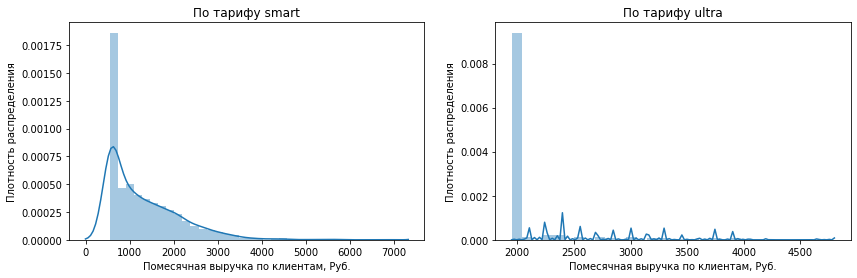

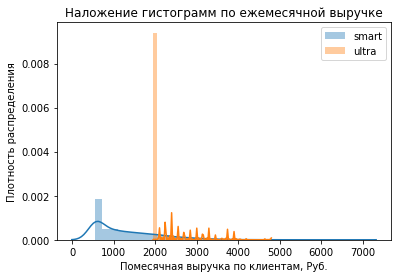

In [14]:
revenue_smart_avg = data_smart['revenue_per_month'].mean()
revenue_smart_var_estimate = np.var(data_smart['revenue_per_month'], ddof=1)
revenue_smart_std_deviation = np.sqrt(revenue_smart_var_estimate)

revenue_ultra_avg = data_ultra['revenue_per_month'].mean()
revenue_ultra_var_estimate = np.var(data_ultra['revenue_per_month'], ddof=1)
revenue_ultra_std_deviation = np.sqrt(revenue_ultra_var_estimate)

print('Средняя выручка по пользователям тарифа smart в мес.:', round(revenue_smart_avg, 2))
print('Дисперсия для выборки по ежемесячной выручке для тарифа smart:', round(revenue_smart_var_estimate, 2))
print('Стандартное отклонение по ежемесячной выручке для тарифа smart:', round(revenue_smart_std_deviation, 2))
print('Общая выручка по пользователям тарифа smart за год:', data_smart['revenue_per_month'].sum())
print('')
print('Средняя выручка по пользователям тарифа ultra в мес.:', round(revenue_ultra_avg, 2))
print('Дисперсия для выборки по ежемесячной выручке для тарифа ultra:', round(revenue_ultra_var_estimate, 2))
print('Стандартное отклонение по ежемесячной выручке для тарифа ultra:', round(revenue_ultra_std_deviation, 2))
print('Общая выручка по пользователям тарифа ultra за год:', data_ultra['revenue_per_month'].sum())

# строим отдельные гистограммы по тарифам
fig, ax4 =plt.subplots(1, 2, figsize=(14, 4))
sns.distplot(data_smart['revenue_per_month'], ax=ax4[0])
ax4[0].set(xlabel = 'Помесячная выручка по клиентам, Руб.', ylabel = 'Плотность распределения')
ax4[0].set_title('По тарифу smart');
sns.distplot(data_ultra['revenue_per_month'], ax=ax4[1])
ax4[1].set(xlabel = 'Помесячная выручка по клиентам, Руб.', ylabel = 'Плотность распределения')
ax4[1].set_title('По тарифу ultra')
plt.show();

# совместная гистограмма
sns.distplot(data_smart['revenue_per_month'], label='smart')
sns.distplot(data_ultra['revenue_per_month'], label='ultra')
plt.xlabel('Помесячная выручка по клиентам, Руб.')
plt.ylabel('Плотность распределения')
plt.title('Наложение гистограмм по ежемесячной выручке')
plt.legend();

Проверим нулевую гипотезу - Проведем статистический тест на равенство средних двух генеральных совокупностей по их выборкам (принимаем, что дисперсии у выборок отличаются):

In [15]:
# Определяем критический уровень статистической значимости
alpha = 0.05

results_1 = st.ttest_ind(data_smart['revenue_per_month'], data_ultra['revenue_per_month'], equal_var = False)
print('p-значение:', results_1.pvalue)

if results_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергается в пользу альтернативной на любом разумном уровне значимости -  Средние выручки пользователей тарифов «Ультра» и «Смарт" за месяц не равны.

### Вывод по первой гипотезе

Первая гипотеза в нашем исследовании подтвердилась. Средние выручки в имеющихся выборках по тарифам также отличаются, средняя ежемесячная выручка по тарифу ultra значительно выше. Скорее всего при росте числа клиентов с тарифом ultra доход оператора сотовой связи увеличится.

 ### Проверка второй гипотезы
 
2-ая гипотеза звучит так - "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов". Примем за нулевую гипотезу H₀ - Средние выручки пользователей из Москвы и из других регионов за месяц равны. Примем за алтернативную гипотезу H₁ - Средние выручки пользователей из Москвы и из других регионов за месяц не равны.

Количество наблюдений по пользователям из Москвы: 611
Средняя выручка по пользователям из Москвы в мес.: 1546.71
Дисперсия для выборки по ежемесячной выручке для пользователей из Москвы: 565636.47
Стандартное отклонение по ежемесячной выручке для пользователей из Москвы: 752.09
Общая выручка по пользователям из Москвы за год: 945042.0

Количество наблюдений по пользователям из регионов: 2603
Средняя выручка по пользователям из регионов в мес.: 1524.94
Дисперсия для выборки по ежемесячной выручке для пользователей из регионов: 654137.63
Стандартное отклонение по ежемесячной выручке для пользователей из регионов: 808.79
Общая выручка по пользователям из регионов за год: 3969409.0


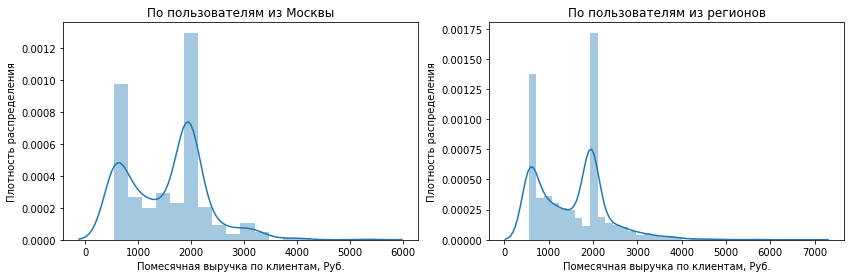

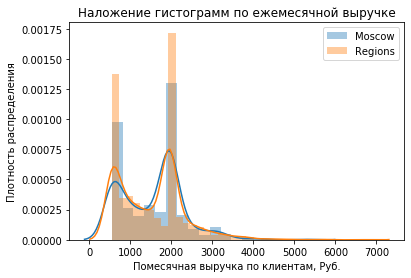

In [16]:
# выделяем выборки по Москве и регионам для исследования
data_moscow = data.loc[data['city'] == 'Москва']
data_regions = data.loc[data['city'] != 'Москва']

# смотрим на средние значения выручек, стандартные отклонения и распределения по Москве и регионам
revenue_moscow_avg = data_moscow['revenue_per_month'].mean()
revenue_moscow_var_estimate = np.var(data_moscow['revenue_per_month'], ddof=1)
revenue_moscow_std_deviation = np.sqrt(revenue_moscow_var_estimate)

revenue_regions_avg = data_regions['revenue_per_month'].mean()
revenue_regions_var_estimate = np.var(data_regions['revenue_per_month'], ddof=1)
revenue_regions_std_deviation = np.sqrt(revenue_regions_var_estimate)

print('Количество наблюдений по пользователям из Москвы:', len(data_moscow))
print('Средняя выручка по пользователям из Москвы в мес.:', round(revenue_moscow_avg, 2))
print('Дисперсия для выборки по ежемесячной выручке для пользователей из Москвы:', round(revenue_moscow_var_estimate, 2))
print('Стандартное отклонение по ежемесячной выручке для пользователей из Москвы:', round(revenue_moscow_std_deviation, 2))
print('Общая выручка по пользователям из Москвы за год:', data_moscow['revenue_per_month'].sum())
print('')
print('Количество наблюдений по пользователям из регионов:', len(data_regions))
print('Средняя выручка по пользователям из регионов в мес.:', round(revenue_regions_avg, 2))
print('Дисперсия для выборки по ежемесячной выручке для пользователей из регионов:', round(revenue_regions_var_estimate, 2))
print('Стандартное отклонение по ежемесячной выручке для пользователей из регионов:', round(revenue_regions_std_deviation, 2))
print('Общая выручка по пользователям из регионов за год:', data_regions['revenue_per_month'].sum())

# строим отдельные гистограммы по тарифам
fig, ax5 =plt.subplots(1, 2, figsize=(14, 4))
sns.distplot(data_moscow['revenue_per_month'], ax=ax5[0])
ax5[0].set(xlabel = 'Помесячная выручка по клиентам, Руб.', ylabel = 'Плотность распределения')
ax5[0].set_title('По пользователям из Москвы');
sns.distplot(data_regions['revenue_per_month'], ax=ax5[1])
ax5[1].set(xlabel = 'Помесячная выручка по клиентам, Руб.', ylabel = 'Плотность распределения')
ax5[1].set_title('По пользователям из регионов')
plt.show();

# совместная гистограмма
sns.distplot(data_moscow['revenue_per_month'], label='Moscow')
sns.distplot(data_regions['revenue_per_month'], label='Regions')
plt.xlabel('Помесячная выручка по клиентам, Руб.')
plt.ylabel('Плотность распределения')
plt.title('Наложение гистограмм по ежемесячной выручке')
plt.legend();

Гистограммы распределений похожи, с двумя пиками соответствующим двум тарифным планам.

Проверим нулевую гипотезу - Проведем статистический тест на равенство средних двух генеральных совокупностей по их выборкам (принимаем, что дисперсии примерно одинаковы):

In [17]:
# Определяем критический уровень статистической значимости
alpha = 0.05

results_2 = st.ttest_ind(data_moscow['revenue_per_month'], data_regions['revenue_per_month'])
print('p-значение:', results_2.pvalue)

if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5440152911670223
Не получилось отвергнуть нулевую гипотезу


Основываясь на статистическом тесте данные из выборок не противоречат нулевой гипотезе - Средние выручки пользователей из Москвы и из других регионов за месяц равны.

### Вывод по второй гипотезе

Вторая гипотеза в нашем исследовании не подтвердилась. Средние ежемесячные выручки в имеющихся выборках по Москве и регионам практически не отличаются. 

## Общий вывод по исследованию
<a id="conclusion"></a>

В исследовании проверялись гипотезы:
1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
2. Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Вместе с этим заказчика интересует, какой тариф приносит больше денег.

Вывод по **первой гипотезе** и рекомендации:
1-ая гипотеза в нашем исследовании подтвердилась, причем средняя выручка за месяц по тарифу «Ультра» заметно выше (2070 против 1290 руб.). В нашей выборке было всего 149 пользователей с тарифом «Ультра» из 500, то есть остальные 351 пользовались тарифом "Смарт". Таким образом пользователей с тарифом "Смарт" было в выборке больше чем в 2 раза, и они принесли выручку за год в размере 2 875 351 руб. Выручка по 149 пользователям тарифа «Ультра» составила 2 039 100 руб. Несложно прикинуть, что при равенстве количества пользователей по тарифам суммарная выручка по тарифу «Ультра» в среднем будет больше выручки по тарифу "Смарт". В тоже время случаи превышений предоплаченных тарифных лимитов по количеству минут, сообщений и интернет-трафику у пользователей тарифа "Смарт" происходят очень часто, и это приносит хорошую выручку. Рекомендую рекламировать больше тариф "Ультра", как для новых пользователей, так и для тех, кто использует тариф "Смарт". Тогда выручка будет еще больше, чем наблюдается сейчас.

Вывод по **второй гипотезе** и рекомендации:
2-ая гипотеза в нашем исследовании не подтвердилась, средняя ежемесячная выручка по пользователям из Москвы существенно не отличается от выручки по пользователям из регионов. Так как ежемесячный доход в Москве выше чем в регионах, есть предложение сделать отдельную линейку тарифов для Москвы, если это позволяет сделать конъюнктура на рынке сотовой связи в Москве, т.е. необходимо дополнительное исследование на этот счет.